# Code

In [60]:
%matplotlib inline

In [61]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


class Circle(object):

    def __init__(self, r=1.0, x=0, y=0):
        self.r = float(r)
        if self.r <= 0:
            raise ValueError('Circle must have a radius > 0')

        self.x = float(x)
        self.y = float(y)

    def point(self, t):
        x = self.r * math.cos(t) + self.x
        y = self.r * math.sin(t) + self.y
        return x, y

# Least Squares Fit

In [62]:
def fit_circle(points):
    pnts = np.array(points)

    # Fit exactly to 3 points
    if len(pnts) == 3:
        x0, y0 = pnts[0]
        x1, y1 = pnts[1]
        x2, y2 = pnts[2]

        A = [[x0**2 + y0**2, y0, 1],
             [x1**2 + y1**2, y1, 1],
             [x2**2 + y2**2, y2, 1]]

        B = [[x0, x0**2 + y0**2, 1],
             [x1, x1**2 + y1**2, 1],
             [x2, x2**2 + y2**2, 1]]

        C = [[x0, y0, 1],
             [x1, y1, 1],
             [x2, y2, 1]]

        cx = la.det(A) / (2.0 * la.det(C))
        cy = la.det(B) / (2.0 * la.det(C))
        r = ((x1-cx)**2.0 + (y1-cy)**2.0)**0.5

        return Circle(r, cx, cy)

    # Least squares fit
    elif len(pnts) > 3:
        xs = pnts[:,0]
        ys = pnts[:,1]

        a = np.column_stack((xs, ys, np.ones_like(xs)))
        b = (-1*(xs**2.0 + ys**2.0))[:, None]
        c = np.linalg.lstsq(a,b)[0]

        x, y = -0.5*c[0][0], -0.5*c[1][0]
        r = math.sqrt((c[0][0]**2.0+c[1][0]**2.0)/4.0 - c[2][0])

        return Circle(r=r, x=x, y=y)

    else:
        raise ValueError("Not enough points to fit a circle")

# Test Circle

In [63]:
# Make a circle
c = Circle(r=2, x=-3, y=-4)

# Results

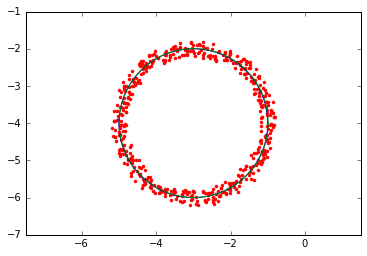

          orig   fitted
    r    2.000    2.002
    x   -3.000   -2.991
    y   -4.000   -3.995


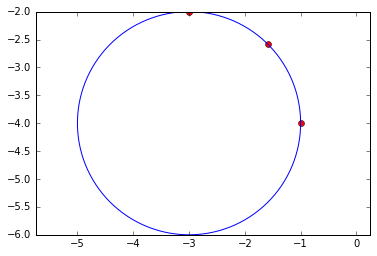

In [64]:
# Sample from it and add some noise
t_vals = np.linspace(0.0, 2*np.pi, 500)
pnts = [c.point(t) for t in t_vals]

noise_pnts = np.array(pnts) + \
             0.4*(np.random.rand(500, 2)-0.5)

# Fit circle to the noisey points
c0 = fit_circle(noise_pnts)
pnts0 = [c0.point(t) for t in t_vals]

# Plot comparison
plt.plot([p[0] for p in noise_pnts], [p[1] for p in noise_pnts], 'r.')
plt.plot([p[0] for p in pnts], [p[1] for p in pnts], 'b-')
plt.plot([p[0] for p in pnts0], [p[1] for p in pnts0], 'g-')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

print("{0:>5} {1:>8} {2:>8}".format(' ', 'orig', 'fitted'))
print("{0:>5} {1:>8.3f} {2:>8.3f}".format('r', c.r, c0.r))
print("{0:>5} {1:>8.3f} {2:>8.3f}".format('x', c.x, c0.x))
print("{0:>5} {1:>8.3f} {2:>8.3f}".format('y', c.y, c0.y))

# Fit a new circle to 3 points
pnts3 = np.array([c.point(t) for t in np.linspace(0.0, 0.5*np.pi, 3)])
c1 = fit_circle(pnts3)
pnts1 = [c1.point(t) for t in t_vals]

# Plot comparison
plt.plot([p[0] for p in pnts3], [p[1] for p in pnts3], 'ro')
plt.plot([p[0] for p in pnts1], [p[1] for p in pnts1], 'b-')
plt.axes().set_aspect('equal', 'datalim')
plt.show()
